<a href="https://colab.research.google.com/github/kiptoo-bit/kiptoo-bit/blob/main/Converting_CSV_to_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install leafmap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.3 MB/s eta 0:00:00


In [2]:
import os
import leafmap.leafmap as leafmap


In [3]:
in_csv = "https://raw.githubusercontent.com/opengeos/data/main/world/world_cities.csv"

In [4]:
df = leafmap.csv_to_df(in_csv)
df

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


In [5]:
Map = leafmap.Map()
Map.add_xy_data(in_csv, x="longitude", y="latitude", layer_name="World Cities")
Map


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [6]:
out_dir = os.path.expanduser("~/Downloads")
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
out_shp = os.path.join(out_dir, "world_cities.shp")

In [7]:
leafmap.csv_to_shp(in_csv, out_shp)

In [8]:
out_geojson = os.path.join(out_dir, "world_cities.geojson")
leafmap.csv_to_geojson(in_csv, out_geojson)

In [9]:
gdf = leafmap.csv_to_gdf(in_csv)
gdf

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.58330,32.53330,75000,POINT (32.5333 0.5833)
1,2,Fort Portal,UGA,0.67100,30.27500,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.64200,15.79900,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.56300,14.65600,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.73700,7.31500,34062,POINT (7.315 45.737)
...,...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000,POINT (-43.22502 -22.92502)
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000,POINT (-46.62502 -23.55868)
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000,POINT (151.18518 -33.92001)
1247,1248,Singapore,SGP,1.29303,103.85582,5183700,POINT (103.85582 1.29303)


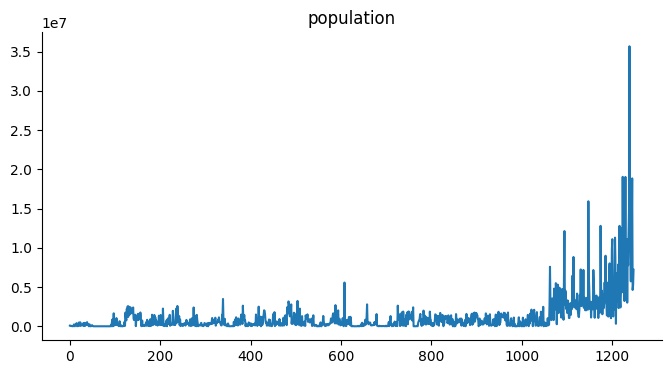

In [10]:
# @title population

from matplotlib import pyplot as plt
gdf['population'].plot(kind='line', figsize=(8, 4), title='population')
plt.gca().spines[['top', 'right']].set_visible(False)